In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from typing import List
from dao.lab_report import DAOLabReport

from dao.attribute import DAOAttributePL

from models.attribute import AttributePL, AttributePLInDB
from models.lab_report import LabReport, LabReportInDB

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading pl196x: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Downloading package wordnet to /home/pawel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
dao_lab_reports: DAOLabReport = DAOLabReport()

dao_attribute: DAOAttributePL = DAOAttributePL()


generated: List[AttributePLInDB] = dao_attribute.find_many_by_query({"is_generated": True})
real: List[AttributePLInDB] = dao_attribute.find_many_by_query({"is_generated": False})

In [3]:
from ml.data_preparation import convert_db_attributes_to_input_data

num_of_features = 10

data = convert_db_attributes_to_input_data(generated, real, num_of_features, exclude_additionally=['stylometrix_metrics'])

In [4]:
data[0][0]

{'average_sentence_word_length': 21.324324324324323,
 'standard_deviation_sentence_word_length': 6.260360295538018,
 'variance_sentence_word_length': 39.19211102994886,
 'standard_deviation_sentence_char_length': 46.77782684138845,
 'variance_sentence_char_length': 2188.165084002922,
 'average_sentence_char_length': 165.32432432432432,
 'average_word_char_length': 6.81702668360864,
 'text_errors_by_category.TYPOGRAPHY': 0.00016252234682268812,
 'text_errors_by_category.TYPOS': 0.0,
 'number_of_errors': 0.0014627011214041932}

In [5]:
feature_dicts = [t[0] for t in data]
labels = [t[1] for t in data]

# Convert the list of dictionaries into a DataFrame
features = pd.DataFrame(feature_dicts)
features['label'] = labels

In [6]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the features
features_scaled = scaler.fit_transform(features)

# Combine the normalized features and labels back into a DataFrame
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)


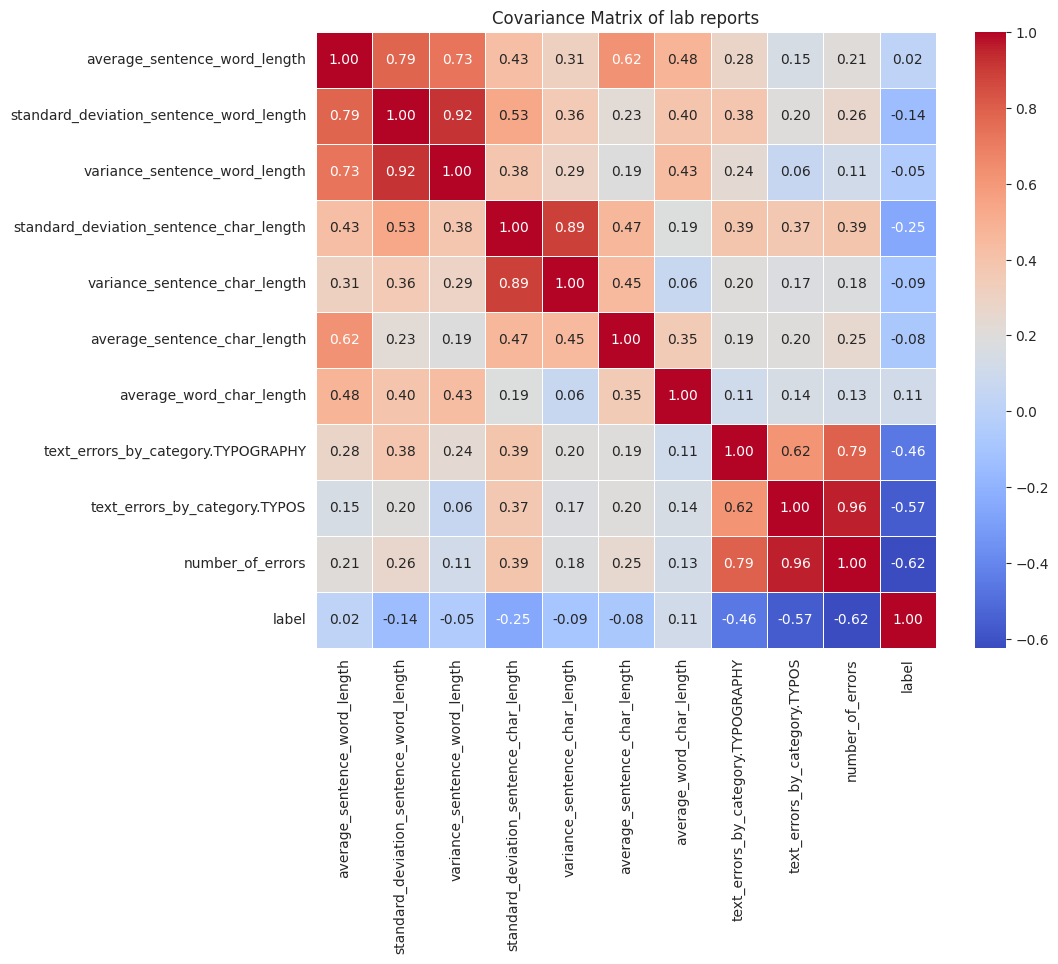

In [7]:
cov_matrix = df_scaled.cov()
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)

# Set titles and labels
plt.title('Covariance Matrix of lab reports')
plt.show()